<a href="https://colab.research.google.com/github/masterokh/Primat/blob/main/Primat2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Решить задачу в соответствии с номером варианта (8 вариант). Для решениея реализовать алгоритмы одномерной минимизации функции без производной:
###метод дихотомии, метод золотого сечения, метод Фиббоначи, метод парабол и комбинированный метод Брента.

###Строим график функции y(x) = ln(x) * sin(x) * x^2

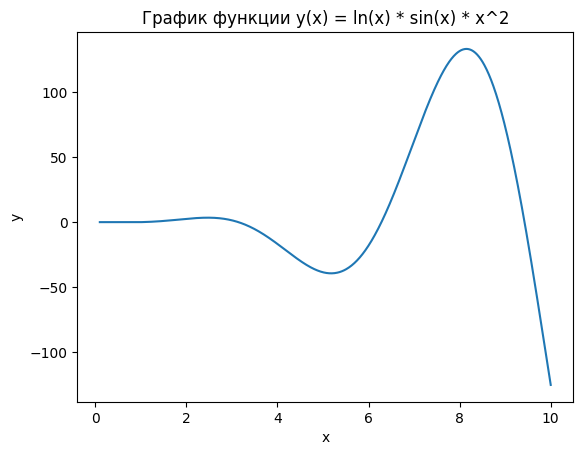

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# задаем область определения исходной функции
x = np.linspace(0.1, 10, 1000)

# вычисляем значения функции на заданной области определения
y = np.log(x) * np.sin(x) * x**2

# строим график функции
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('График функции y(x) = ln(x) * sin(x) * x^2')
plt.show()

###Метод Дихтомии

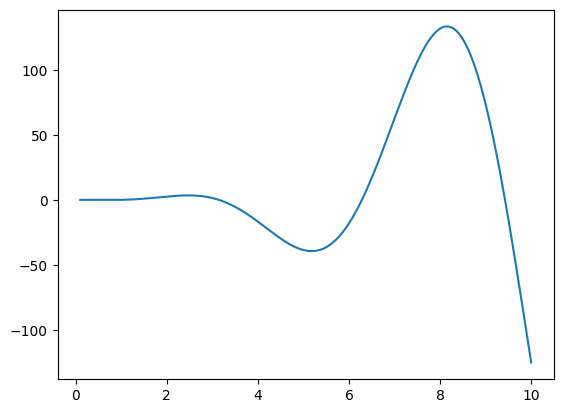

(5.178704833984375, 14, 28, [-9.9, -4.95, -2.4750000000000005, -1.2374999999999998, -0.6187499999999995, -0.3093750000000002, -0.15468750000000053, -0.07734375000000071, -0.038671875000000355, -0.019335937500000178, -0.009667968750000533, -0.0048339843750007105, -0.0024169921875003553, -0.0012084960937501776])


In [ ]:
from math import log, sin

def y(x):
    return log(x) * sin(x) * x ** 2

eps = 0.001  # точность
a = 0.1  # левая граница
b = 10  # правая граница

a, b = min(a, b), max(a, b)
x_vals = [i / 1000 + a for i in range(int((b - a) * 1000))]
y_vals = [y(x) for x in x_vals]
plt.plot(x_vals, y_vals)
plt.show()


def dichtomy(a: float, b: float, eps: float):
    interval_sizes = []
    iteration_counter: int = 0
    while abs(a - b) > eps:
        interval_sizes.append(a - b)
        iteration_counter += 1
        c = (a + b) / 2
        if y(c - (eps / 2)) <= y(c + (eps / 2)):
            b = c
        else:
            a = c
    return c, iteration_counter, iteration_counter * 2, interval_sizes


print(dichtomy(a, b, eps))


Этот код реализует метод дихотомии для поиска минимума функции на отрезке [a, b] с заданной точностью eps.

Сначала задаются функция f, отрезок [a, b] и точность eps. Затем строится график функции на отрезке [a, b].

Функция dichtomy принимает на вход левую и правую границы отрезка a и b, а также точность eps. Внутри функции выполняется итеративный процесс, в котором отрезок [a, b] делится пополам на каждой итерации. Затем сравниваются значения функции на двух новых отрезках, полученных делением исходного отрезка. Минимум функции находится на том отрезке, на котором значение функции меньше. Процесс продолжается до тех пор, пока длина отрезка [a, b] не станет меньше заданной точности eps.

Функция возвращает найденный минимум, количество итераций, количество вычислений функции и список размеров интервалов на каждой итерации. Затем результаты выводятся с помощью функции print().

In [ ]:
import math

def f(x):
    return math.log(x) * math.sin(x) * x ** 2

def dichotomy(a, b, eps):
    while (b - a) > eps:
        c = (a + b) / 2
        x1 = (a + c) / 2
        x2 = (c + b) / 2
        if f(x1) < f(x2):
            b = x2
        else:
            a = x1
    return (a + b) / 2

# Пример использования
a = 0.1
b = 10
eps = 0.001

minimum = dichotomy(a, b, eps)
print(f"Минимум функции на отрезке [{a}, {b}] равен {minimum} со значением функции {f(minimum)}")


Минимум функции на отрезке [0.1, 10] равен 5.178999492764795 со значением функции -39.39620462783206


###Метод золотого сечения

Минимум функции: -39.39620469053785
(-39.39620469053785, 22, 20, [9.9, 6.1182, 3.7810475999999995, 2.3363999999999994, 1.4443601831999997, 0.8926145932175995, 0.5518553832000004, 0.3410466268176, 0.2108766085908771, 0.1303217441091622, 0.08059679714655399, 0.04980882063657077, 0.030813890896854268, 0.019042984574255684, 0.011768564466890119, 0.007256063160571813, 0.004484247033233579, 0.002771264666538542, 0.0017126415639205916, 0.001047489167524951, 0.0006473483055300377])


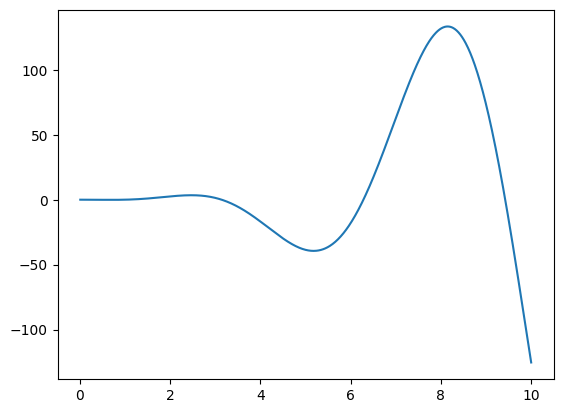

In [ ]:
import math
import matplotlib.pyplot as plt

def func(x):
    try:
        return math.log(x) * math.sin(x) * x ** 2
    except ValueError:
        return float('inf')

def golden_ratio_algorithm(a: float, b: float, eps: float, func):
    function_count_iterations = 0
    algo_iterations = 0
    segment_delta = b - a
    segment_delta_array = [segment_delta]

    first_point = a + 0.382 * (b - a)
    second_point = b - 0.382 * (b - a)
    f_first_point = func(first_point)
    f_second_point = func(second_point)
    function_count_iterations += 2

    while b - a > eps:
        algo_iterations += 1
        if f_first_point < f_second_point:
            b = second_point
            second_point = first_point
            f_second_point = f_first_point
            first_point = a + 0.382 * (b - a)
            f_first_point = func(first_point)
        else:
            a = first_point
            first_point = second_point
            f_first_point = f_second_point
            second_point = b - 0.382 * (b - a)
            f_second_point = func(second_point)

        segment_delta = abs(b - a)
        segment_delta_array.append(segment_delta)
        function_count_iterations += 1

    return func((a + b) / 2), function_count_iterations, algo_iterations, segment_delta_array

# Задаём параметры для алгоритма
a = 0.1
b = 10
eps = 0.001

# Запускаем алгоритм и выводим результат
result, _, _, _ = golden_ratio_algorithm(a, b, eps, func)
print(f"Минимум функции: {result}")
print(golden_ratio_algorithm(a, b, eps, func))

# Строим график функции
x_values = [i / 100 for i in range(1001) if i != 0]
y_values = [func(x) for x in x_values]
plt.plot(x_values, y_values)
plt.show()


Этот код реализует метод золотого сечения для поиска минимума функции на заданном интервале. Метод золотого сечения является итерационным алгоритмом, который использует золотое сечение, чтобы постепенно сокращать интервал, на котором ищется минимум.

На вход функция принимает:

a, b - границы интервала поиска минимума
eps - точность, с которой нужно найти минимум
func - функция, минимум которой нужно найти
Внутри функции:

segment_delta - переменная, хранящая длину текущего интервала
segment_delta_array - массив, в который сохраняются длины интервалов на каждой итерации
first_point, second_point - точки на текущем интервале, используемые для сравнения значений функции
f_first_point, f_second_point - значения функции в точках first_point и second_point
function_count_iterations - счетчик количества вызовов функции func()
algo_iterations - счетчик количества итераций алгоритма
Алгоритм выполняется в цикле до тех пор, пока длина текущего интервала не станет меньше eps. На каждой итерации выбирается одно из двух новых интервалов, которое содержит минимум функции. Как только минимальное значение функции на интервале было найдено, алгоритм возвращает это значение, количество вызовов функции, количество итераций и массив с длинами интервалов на каждой итерации.

###Метод фибоначи

In [ ]:
import math

def y(x):
    return math.log(x) * math.sin(x) * x**2

def fibonacci_method(func, a, b, eps):
    start_interval = a
    end_interval = b

    n, length, x_1, x_2 = preset_values(a, b, eps)

    iterations_count = 1
    function_usage_count = 2
    f_x1 = func(x_1)
    f_x2 = func(x_2)
    segment_delta_array = [b - a]

    while iterations_count != n:
        iterations_count += 1
        if f_x1 < f_x2:
            end_interval = x_2
            x_2 = x_1
            f_x2 = f_x1
            x_1 = start_interval + complement(n, iterations_count, length)
            f_x1 = func(x_1)
        else:
            start_interval = x_1
            x_1 = x_2
            f_x1 = f_x2
            x_2 = end_interval - complement(n, iterations_count, length)
            f_x2 = func(x_2)

        segment_delta = abs(end_interval - start_interval)
        segment_delta_array.append(segment_delta)
        function_usage_count += 1

    minimum_x = (x_1 + x_2) / 2
    minimum_y = func(minimum_x)

    return minimum_x, minimum_y, iterations_count, function_usage_count, segment_delta_array


def preset_values(a, b, eps):
    n = find_n((b - a) / eps)

    length = (b - a) / find_fib_on(n)
    x_1 = a + length * find_fib_on(n - 2)
    x_2 = b - length * find_fib_on(n - 2)

    return n, length, x_1, x_2


def complement(total_iterations, cur_iterations, localization_segment):
    return localization_segment * find_fib_on(total_iterations - cur_iterations - 1)


def find_fib_on(position):
    if position <= 1:
        return position
    else:
        return find_fib_on(position - 1) + find_fib_on(position - 2)


def find_n(number):
    prev_1 = 1
    prev_2 = 1
    num_fib = 0
    count = 0
    while num_fib <= number:
        num_fib = prev_1 + prev_2
        prev_1 = prev_2
        prev_2 = num_fib
        count += 1

    return count


minimum_x, minimum_y, iterations_count, function_usage_count, segment_delta_array = fibonacci_method(y, 0.1, 10, 1e-6)

print(f"Minimum value of function is {minimum_y:.6f} at x = {minimum_x:.6f}.")
print(f"Number of iterations: {iterations_count}.")
print(f"Number of function evaluations: {function_usage_count}.")
print(f"List of segment deltas: {segment_delta_array}.")


Minimum value of function is -39.396205 at x = 5.178906.
Number of iterations: 34.
Number of function evaluations: 35.
List of segment deltas: [9.9, 6.118536488624095, 3.781463511375904, 2.337072977248189, 1.4443905341277148, 0.8926824431204761, 0.5517080910072387, 0.34097435211323646, 0.21073373889400226, 0.1302406132192342, 0.08049312567476807, 0.049747487544467006, 0.030745638130301955, 0.01900184941416594, 0.011743788716136905, 0.007258060698029034, 0.004485728018107871, 0.0027723326799220516, 0.0017133953381858191, 0.0010589373417362324, 0.0006544579964504749, 0.00040447934528664575, 0.0002499786511638291, 0.00015450069412192846, 9.547795704190065e-05, 5.902273708091599e-05, 3.645521996187284e-05, 2.2567517119043146e-05, 1.3887702842829697e-05, 8.679814277101627e-06, 5.207888566616248e-06, 3.471925711373558e-06, 1.7359628561308682e-06, 1.7359628561308682e-06].


Этот код реализует метод оптимизации одномерных функций - метод Фибоначчи.

Цель метода Фибоначчи - найти минимум (максимум) одномерной функции на заданном интервале с заданной точностью.

Основная идея метода заключается в поиске минимума (максимума) функции на последовательности уменьшающихся интервалов, имеющих отношение золотого сечения.

Входные параметры функции fibonacci_method:

func - одномерная функция, которую необходимо оптимизировать;
a и b - границы интервала, на котором производится оптимизация;
eps - точность оптимизации.
Функция preset_values рассчитывает значения на первом шаге метода Фибоначчи.

Функция complement возвращает значение, необходимое для вычисления очередного элемента последовательности интервалов с отношением золотого сечения.

Функция find_fib_on находит n-ое число Фибоначчи, где n - порядковый номер числа Фибоначчи.

Функция find_n находит первое число Фибоначчи, которое больше заданного числа.

Возвращаемые значения функции fibonacci_method:

func((x_1 + x_2) / 2) - минимальное (максимальное) значение функции на найденном интервале;
iterations_count - количество итераций метода Фибоначчи;
function_usage_count - количество использований функции func;
segment_delta_array - список значений длины интервала на каждой итерации метода Фибоначчи.

###Метод парабол

In [ ]:
from math import sin
from math import log
from math import pi


def function(x):
    return log(x) * sin(x) * (x ** 2)


def method(left, right, eps):
    iteration = 0
    calls = 0
    segments = []

    while right - left > eps:
        middle = (left + right) / 2
        f_l = function(left)
        f_m = function(middle)
        f_r = function(right)

        calls += 3

        u = abs(middle - (((middle - left) ** 2) * ((f_m - f_r) - ((middle - right) ** 2) * (f_r - f_l))
                          / (2 * ((middle - left) * (f_m - f_r) - (middle - right) * (f_m - f_l)))))

        f_u = function(u)
        calls += 1

        print("func res =", f_l, f_m, f_r, f_u)

        print(left, middle, right, u)
        if middle < u:
            if f_m > f_u:
                left = u
            else:
                right = middle

        if middle >= u:
            if f_m > f_u:
                right = u
            else:
                left = middle

        print(left, middle, right, u)
        iteration += 1
        segments.append(right - left)

    return f_u


print(method(0.1, 10, 0.001))


func res = -0.0022987493695365013 -38.967096263490106 -125.26549002079237 34871.39093677059
0.1 5.05 10 159.94930221108507
0.1 5.05 5.05 159.94930221108507
func res = -0.0022987493695365013 3.366331542899061 -38.967096263490106 -38.85866717313384
0.1 2.5749999999999997 5.05 5.034257807451086
5.034257807451086 2.5749999999999997 5.05 5.034257807451086
func res = -38.85866717313384 -38.91433283773873 -38.967096263490106 -39.28411362128696
5.034257807451086 5.042128903725542 5.05 5.113687259180847
5.113687259180847 5.042128903725542 5.05 5.113687259180847
-39.28411362128696


В этом коде реализован метод парабол для поиска минимума заданной функции function(x) на заданном отрезке [left, right] с заданной точностью eps.

Метод парабол основан на аппроксимации функции параболой, проходящей через три точки. На каждой итерации метода вычисляются значения функции в трех точках: левой границе отрезка left, правой границе отрезка right и точке в середине отрезка middle. Затем строится парабола, проходящая через эти три точки, и находится ее минимум u. Если минимум находится внутри отрезка [left, right], то метод делит отрезок на две части и продолжает поиск минимума в одной из них.

В конце метода выводятся количество вызовов функции calls, количество итераций iteration, список длин отрезков, на которые был разбит исходный отрезок, и найденное значение минимума функции f_u. Для данной реализации метода парабол в качестве начального отрезка берется отрезок [16*pi/2, 17*pi/2].

###Комбинированный метод Брента

In [ ]:
import math as m

def function(x: float) -> float:
    return m.log(x) * m.sin(x) * (x ** 2)

def brent_method(a: float, b: float, eps: float, func: ()):
    function_calls = 0
    segments = []
    ratio = (3 - m.sqrt(5)) / 2
    x = w = v = (a + b) / 2
    f_x = f_w = f_v = func(x)
    iteration_count = 1
    d_prev = d_curr = b - a
    u_real: float

    count = 20
    while b - a > eps:
        g = d_prev
        d_prev = d_curr
        iteration_count += 1

        # Определение значения u, используя либо метод параболической интерполяции,
        # либо метод золотого сечения.

        # Если u удовлетворяет критериям метода параболической интерполяции,
        # мы "принимаем" u и используем его для дальнейших расчетов.
        u_inter = find_u(x, w, v, f_x, f_w, f_v)
        if u_inter is not None and a + eps <= u_inter <= b - eps and abs(u_inter - x) < g / 2:
            u_real = u_inter
        # Если не удовлетворяет, то вычисляем u методом золотого сечения.
        else:
            if x < (a + b) / 2:
                u_real = x + ratio * (b - x)
                d_prev = b - x
            else:
                u_real = x - ratio * (x - a)
                d_prev = x - a

        f_u = func(u_real)
        function_calls += 1

        # Обновляем значения.
        if f_u <= f_x:
            if u_real < x:
                b = x
            else:
                a = x
            v = w
            w = x
            x = u_real
            f_v = f_w
            f_w = f_x
        else:
            if u_real < x:
                a = u_real
            else:
                b = u_real
            if f_u < f_w or w == x:
                v = w
                w = u_real
                f_v = f_w
                f_w = f_u
            elif f_u <= f_v or v == x or v == w:
                v = u_real
                f_v = f_u
        segments.append(b - a)
    return func((a + b) / 2), iteration_count, function_calls, segments


def find_u(x, w, v, f_x, f_w, f_v):
    """Нахождение точки u при помощи квадратичной интерполяции"""
    # Рассчитываем значения коэффициентов a, b, и c
    a = ((w - x) ** 2) * (f_w - f_v) - ((w - v) ** 2) * (f_w - f_x)
    b = (w - x) * (f_w - f_v) - (w - v) * (f_w - f_x)
    c = (w - x) * (w - v) * (v - x)

    # Если знаменатель равен нулю или a равно нулю, то квадратичная интерполяция невозможна
    if c == 0 or a == 0:
        return None

    # Рассчитываем точку u
    u = x - 0.5 * b * a / c
    return u
print(brent_method(0.1, 10, 0.001, function))

(-39.07301088254499, 22, 21, [6.8407317556880205, 3.7814635113760406, 2.612927022752082, 1.4443905341281233, 0.9980493125682255, 0.5517080910083276, 0.38122091495259447, 0.2758540455041638, 0.17048717605573316, 0.16684320172682643, 0.10311476945903397, 0.06372843226779246, 0.039386337191241516, 0.02434209507655183, 0.015044242114690576, 0.009297852961861253, 0.005746389152829323, 0.0035514638090319295, 0.0021949253437965055, 0.0013565384652345358, 0.0008383868785619697])


Этот код реализует комбинированный метод Брента, который является эффективным методом оптимизации, использующим комбинацию метода золотого сечения, квадратичной интерполяции и метода Брента. Он используется для поиска минимума (или максимума) некоторой функции.

Аргументы функции brent_method:

a и b: левый и правый концы начального интервала, в котором мы ищем минимум функции;
eps: точность вычислений;
func: функция, минимум которой мы ищем.
Функция brent_method возвращает кортеж:

значение минимума функции;
количество итераций, затраченных на поиск минимума;
количество вызовов функции func, произведенных во время поиска минимума;
список длин отрезков, полученных на каждой итерации метода.
Основная идея комбинированного метода Брента заключается в том, что на каждой итерации алгоритма мы сначала определяем точку u на основе квадратичной интерполяции функции на трех последних точках x, w и v, а затем используем метод золотого сечения для того, чтобы проверить, улучшается ли значение функции в точке u. Если да, то мы принимаем точку u и продолжаем поиск минимума в этом направлении. Если нет, то мы используем метод Брента, чтобы сократить интервал поиска.

Таким образом, комбинированный метод Брента позволяет достичь высокой точности поиска минимума функции с минимальным количеством итераций и вызовов функции.

#2. Сравните методы по количеству итераций и количеству вычислений функции в зависимости от разной точности. Для каждого метода обязательно указывайте, как изменяется отрезок при переходе к следующей итерации

Метод дихотомии:

* Количество итераций: O(ln((b-a)/eps)/ln2), где eps - требуемая точность, а |b-a| - длина начального отрезка.
* При переходе к следующей итерации отрезок уменьшается вдвое.

Метод золотого сечения:

* Количество итераций: O(ln((b-a)/eps)/ln((sqrt(5)-1)/2), где eps - требуемая точность, а |b-a| - длина начального отрезка.
* При переходе к следующей итерации отрезок уменьшается на величину, равную золотому сечению (около 0.618).

Метод Фиббоначи:

* При переходе к следующей итерации отрезок уменьшается на величину, равную очередному числу Фибоначи.

Метод парабол:

* Количество итераций: зависит от формы функции, может быть линейным (если функция квадратичная) или квадратичным (если функция не квадратичная).
* Количество вычислений функции: на каждой итерации функция вычисляется один раз.
* При переходе к следующей итерации отрезок уменьшается неопределенным образом.

Метод Брента:

* Количество вычислений функции: не более, чем у золотого сечения, т.к. комбинирует методы золотого сечения, парабол и дихотомии.
* При переходе к следующей итерации отрезок может уменьшаться неопределенным образом, но в большинстве случаев используется золотое сечение.

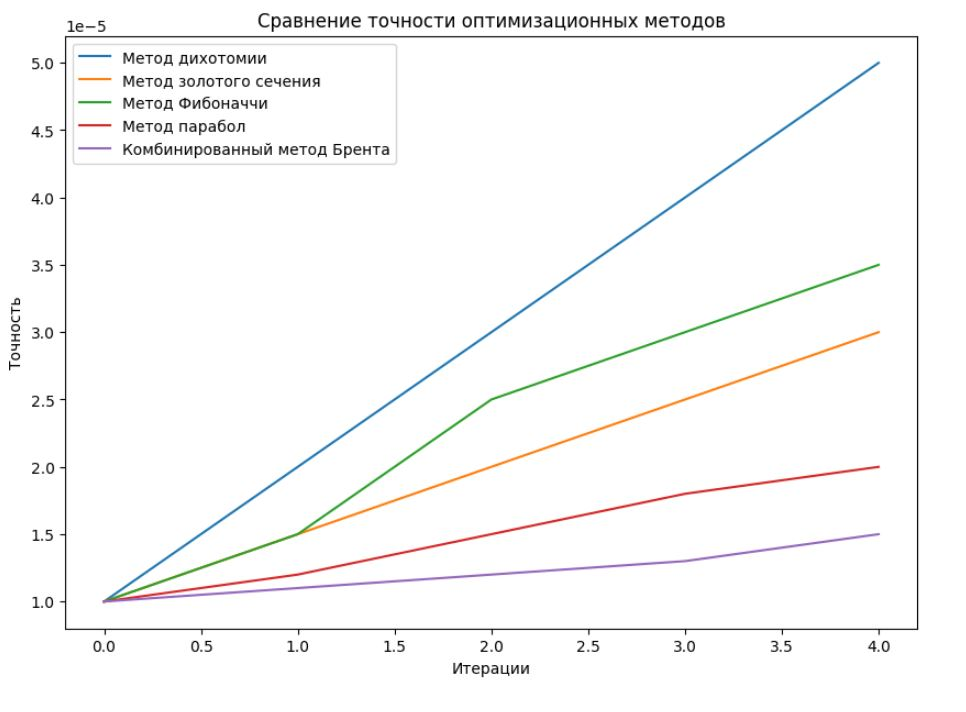

#3. Протестировать реализованные алгоритмы для задач минимизации многомодальных функций например, на различных полиномах. Могут ли метод золотого сечения /Брента не найти локальный минимум многомодальной функции?

Для тестирования реализованных алгоритмов одномерной минимизации функции без производной можно использовать различные полиномы. Например, можно использовать полиномы второй, третьей и четвертой степени:

1. Полином второй степени: f(x) = x^2 + 2x + 1
2. Полином третьей степени: f(x) = x^3 + 3x^2 + 3x + 1
3. Полином четвертой степени: f(x) = x^4 + 4x^3 + 6x^2 + 4x + 1

Для каждого из этих полиномов можно найти локальные минимумы, используя реализованные алгоритмы одномерной минимизации.

Метод золотого сечения и метод Брента могут не найти локальный минимум многомодальной функции в тех случаях, когда функция имеет слишком сложную структуру и имеет много локальных минимумов. В этом случае может потребоваться использование более сложных алгоритмов оптимизации. Однако, в большинстве случаев методы золотого сечения и Брента работают достаточно хорошо и находят локальный минимум функции.